In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import sep as sep
import seaborn as sns

In [2]:
exp_path = 'Y:\Lior&Einav\Experiments\experiment11_140720'

In [37]:
#T = pd.read_csv(exp_path+sep+'trophallaxis_table_enriched_temp.csv')
T = pd.read_csv(r'Y:\Lior&Einav\data_cleaning meeting 081221\trophallaxis_table_enriched_temp.csv')
T.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_got__red,ant2_got_yellow,ant1_crop_before__red,ant1_crop_before_yellow,ant2_crop_before__red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,5397.756970,1069.492395,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,0.000000,-320029.087952,0.000000,0.000000,0.0,377406.701172,2908.261422,1729.050217,3155.648010,1833.521815
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,12627.693945,4694.043713,2955.439978,2304.488525,0.0,0.000000,768.371633,2674.638064,NaN,NaN
3,3,1,44.0,169,529,240,243,240,243,1743.842554,...,4294.202209,2896.258789,12627.693945,4694.043713,0.0,0.000000,1277.737512,620.124326,1055.534043,676.616630
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,1696.540088,42296.675000,330970.803125,57377.613220,0.0,324437.150000,2554.004447,1205.929948,2301.130591,1053.142127


In [38]:
conversion_factors = pd.read_csv(exp_path +sep+ 'conversion_factors_by_weight_and_feeding_sum.csv')
conversion_factors

,red,yellow
0,68482.697584,56792.534613


In [41]:
T.loc[:,'ant1_got_red_ul'] = T.ant1_got__red/conversion_factors.red[0]
T.loc[:,'ant1_got_yellow_ul'] = T.ant1_got_yellow/conversion_factors.yellow[0]
T.loc[:,'ant2_got_red_ul'] = T.ant2_got__red/conversion_factors.red[0]
T.loc[:,'ant2_got_yellow_ul'] = T.ant2_got_yellow/conversion_factors.yellow[0]
T.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_crop_before__red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,0.0,0.000000,NaN,NaN,NaN,NaN,0.043156,0.040577,0.078819,0.018832
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,0.0,377406.701172,2908.261422,1729.050217,3155.648010,1833.521815,0.022529,2.143343,0.000000,-5.635056
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,0.0,0.000000,768.371633,2674.638064,NaN,NaN,-0.002181,-0.018396,0.184392,0.082652
3,3,1,44.0,169,529,240,243,240,243,1743.842554,...,0.0,0.000000,1277.737512,620.124326,1055.534043,676.616630,0.025464,0.054416,0.062705,0.050997
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,0.0,324437.150000,2554.004447,1205.929948,2301.130591,1053.142127,0.729827,0.086781,0.024773,0.744758


In [42]:
M = 0.1 # minimum transfer volume

In [43]:
def classify_ant_by_own_measurement(got_red, got_yellow):
    giver1 = (got_red < M) & (got_yellow <= -M)
    giver2 = (got_red <= -M) & (got_yellow < M)
    giver = giver1 | giver2
    
    receiver1 = (got_red > -M) & (got_yellow >= M)
    receiver2 = (got_red >= M) & (got_yellow > -M)
    receiver = receiver1 | receiver2
    
    vol0 = (abs(got_red) < M) & (abs(got_yellow) < M)
    
    inconsistent1 = (got_red >= M) & (got_yellow <= -M)
    inconsistent2 = (got_red <= -M) & (got_yellow >= M)
    inconsistent = inconsistent1 | inconsistent2
    
    return giver, receiver, vol0, inconsistent

In [44]:
ant1_g, ant1_r, ant1_0, ant1_X = classify_ant_by_own_measurement(T.ant1_got_red_ul, T.ant1_got_yellow_ul)

In [45]:
sum(ant1_g)+sum(ant1_r)+sum(ant1_0)+sum(ant1_X)

1203

In [46]:
T[ant1_g+ant1_r+ant1_0+ant1_X == False]

C:\Users\liorba\Anaconda3\envs\Experimenting\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_crop_before__red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
1198,1198,10,205.0,72,552,811,836,9820,9845,NaN,...,435242.598535,519468.412500,NaN,NaN,775.096400,1224.501555,NaN,NaN,-2.106124,-2.648616
1204,1204,10,229.0,329,392,889,891,9898,9900,NaN,...,306837.768750,325742.140625,2966.534251,3221.280366,2772.256063,3074.161281,NaN,NaN,NaN,NaN


In [47]:
ant2_g, ant2_r, ant2_0, ant2_X = classify_ant_by_own_measurement(T.ant2_got_red_ul, T.ant2_got_yellow_ul)

In [48]:
sum(ant2_g)+sum(ant2_r)+sum(ant2_0)+sum(ant2_X)

1189

In [49]:
T[ant2_g+ant2_r+ant2_0+ant2_X == False]

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_crop_before__red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
25,25,1,171.0,392,-1,905,970,905,970,-44496.792969,...,NaN,NaN,950.939496,773.051471,NaN,NaN,-0.649752,-3.205349,NaN,NaN
330,330,5,36.0,150,-1,72,119,4076,4123,-63149.006250,...,NaN,NaN,1346.672151,948.834522,NaN,NaN,-0.922116,-0.014468,NaN,NaN
403,403,5,218.0,429,-1,463,463,4467,4467,-74685.364960,...,NaN,NaN,1026.465692,1188.360374,NaN,NaN,-1.090573,0.185572,NaN,NaN
473,473,5,428.0,289,-1,860,883,4864,4887,11992.876465,...,NaN,NaN,679.489801,2645.135497,NaN,NaN,0.175123,-1.134076,NaN,NaN
488,488,5,405.0,23,-1,962,970,4966,4974,-5717.325586,...,NaN,NaN,1295.069258,1586.193618,NaN,NaN,-0.083486,-1.134307,NaN,NaN
503,503,6,14.0,418,-1,34,38,5039,5043,-38809.216363,...,NaN,NaN,1360.821317,1646.383129,NaN,NaN,-0.566701,-0.645576,NaN,NaN
594,594,6,162.0,1,-1,644,649,5649,5654,47128.635105,...,NaN,NaN,NaN,NaN,NaN,NaN,0.688183,0.017113,NaN,NaN
636,636,6,212.0,552,-1,874,876,5879,5881,-92442.968750,...,NaN,NaN,1200.340724,910.189633,NaN,NaN,-1.349873,-0.691483,NaN,NaN
719,719,7,131.0,289,-1,554,654,6560,6660,-29288.728968,...,NaN,NaN,1575.624551,1901.079435,NaN,NaN,-0.427681,-3.587012,NaN,NaN
792,792,8,232.0,552,-1,171,206,7178,7213,59142.347664,...,NaN,NaN,1468.993192,1253.651705,NaN,NaN,0.863610,0.020459,NaN,NaN


## Within-ant consistency

In [50]:
ant1_inconsistency = np.mean(ant1_X)
ant2_inconsistency = np.mean(ant2_X)
print(f'ant1 inconsistency: {ant1_inconsistency}')
print(f'ant2 inconsistency: {ant2_inconsistency}')


ant1 inconsistency: 0.16099585062240665
ant2 inconsistency: 0.15269709543568466


In [51]:
mean_within_ant_inconsistency = np.mean([ant1_inconsistency,ant2_inconsistency])
print(f'mean within-ant inconsistency: {mean_within_ant_inconsistency}')

mean within-ant inconsistency: 0.15684647302904564


In [52]:
both_ants_consistent_by_own_measurements = (ant1_X==False) & (ant2_X==False)
mean_both_ants_consistent_by_own_measurements = np.mean(both_ants_consistent_by_own_measurements)
print(f'both ants consistent by own measurements: {mean_both_ants_consistent_by_own_measurements}')

both ants consistent by own measurements: 0.7087136929460581


In [53]:
both_ants_inconsistent_by_own_measurements = (ant1_X) & (ant2_X)
mean_both_ants_inconsistent_by_own_measurements = np.mean(both_ants_inconsistent_by_own_measurements)
print(f'both ants inconsistent by own measurements: {mean_both_ants_inconsistent_by_own_measurements}')

both ants inconsistent by own measurements: 0.022406639004149378


## Between-ant consistency

In [54]:
ant1_to_ant2_a = ant1_g & (ant2_r | ant2_0)
ant1_to_ant2_b = ant2_r & (ant1_g | ant1_0)
ant1_to_ant2 = ant1_to_ant2_a | ant1_to_ant2_b

ant2_to_ant1_a = ant2_g & (ant1_r | ant1_0)
ant2_to_ant1_b = ant1_r & (ant2_g | ant2_0)
ant2_to_ant1 = ant2_to_ant1_a | ant2_to_ant1_b

vol0 = ant1_0 & ant2_0

inconsistent = (ant1_g & ant2_g) | (ant1_r & ant2_r)

one_inconsistent_ant = (ant1_X | ant2_X) & ~(ant1_X & ant2_X)

both_ants_inconsistent = (ant1_X & ant2_X)

In [55]:
sum(ant1_to_ant2)+sum(ant2_to_ant1)+sum(vol0)+sum(inconsistent)+sum(one_inconsistent_ant)+ sum(both_ants_inconsistent)

1191

In [56]:
T[ant1_to_ant2+ant2_to_ant1+vol0+inconsistent+one_inconsistent_ant+both_ants_inconsistent == False]

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_crop_before__red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
25,25,1,171.0,392,-1,905,970,905,970,-44496.792969,...,NaN,NaN,950.939496,773.051471,NaN,NaN,-0.649752,-3.205349,NaN,NaN
330,330,5,36.0,150,-1,72,119,4076,4123,-63149.006250,...,NaN,NaN,1346.672151,948.834522,NaN,NaN,-0.922116,-0.014468,NaN,NaN
488,488,5,405.0,23,-1,962,970,4966,4974,-5717.325586,...,NaN,NaN,1295.069258,1586.193618,NaN,NaN,-0.083486,-1.134307,NaN,NaN
503,503,6,14.0,418,-1,34,38,5039,5043,-38809.216363,...,NaN,NaN,1360.821317,1646.383129,NaN,NaN,-0.566701,-0.645576,NaN,NaN
594,594,6,162.0,1,-1,644,649,5649,5654,47128.635105,...,NaN,NaN,NaN,NaN,NaN,NaN,0.688183,0.017113,NaN,NaN
636,636,6,212.0,552,-1,874,876,5879,5881,-92442.968750,...,NaN,NaN,1200.340724,910.189633,NaN,NaN,-1.349873,-0.691483,NaN,NaN
719,719,7,131.0,289,-1,554,654,6560,6660,-29288.728968,...,NaN,NaN,1575.624551,1901.079435,NaN,NaN,-0.427681,-3.587012,NaN,NaN
792,792,8,232.0,552,-1,171,206,7178,7213,59142.347664,...,NaN,NaN,1468.993192,1253.651705,NaN,NaN,0.863610,0.020459,NaN,NaN
793,793,8,231.0,445,-1,171,227,7178,7234,-135953.154351,...,NaN,NaN,1309.369781,1446.596489,NaN,NaN,-1.985219,-1.728785,NaN,NaN
996,996,9,211.0,56,-1,512,523,8520,8531,-8797.559019,...,NaN,NaN,976.550366,1972.598337,NaN,NaN,-0.128464,-2.735392,NaN,NaN


In [57]:
np.mean(inconsistent)

0.1908713692946058

In [58]:
np.mean(ant1_to_ant2 | ant2_to_ant1 | vol0)

0.5062240663900415

## Scan minimum threshold values

In [59]:
def get_inconsistency_within(ant1_X, ant2_X):
    inconsistency_within_1 = np.mean(ant1_X)
    inconsistency_within_2 = np.mean(ant2_X)
    return np.mean([inconsistency_within_1,inconsistency_within_2]) 

In [60]:
def get_vol0_within(ant1_0, ant2_0):
    vol0_1 = np.mean(ant1_0)
    vol0_2 = np.mean(ant2_0)
    return np.mean([vol0_1,vol0_2])

In [61]:
def get_inconsistent_interactions(ant1_g,ant2_g,ant1_r,ant2_r):
    inconsistent = (ant1_g & ant2_g) | (ant1_r & ant2_r)
    return np.mean(inconsistent)

In [62]:
def get_vol0_interactions(ant1_0,ant2_0):
    vol0 = ant1_0 & ant2_0
    return np.mean(vol0)

In [63]:
def get_one_inconsistent_ant(ant1_X, ant2_X):
    one_inconsistent_ant = ant1_X != ant2_X
    return np.mean(one_inconsistent_ant)

In [64]:
def get_two_inconsistent_ants(ant1_X,ant2_X):
    both_inconsistent = ant1_X & ant2_X
    return np.mean(both_inconsistent)

In [65]:
def get_consistent_directional(ant1_g, ant1_r, ant1_0, ant2_g, ant2_r, ant2_0):
    directional1 = ant1_g & (ant2_r | ant2_0)
    directional2 = ant1_r & (ant2_g | ant2_0)
    directional3 = ant1_0 & (ant2_g | ant2_r)
    return np.mean(directional1 | directional2 | directional3)

In [66]:
interaction_stats_dict = {'inconsistent interactions':[], 'zero-volume interactions':[],
             'one ant inconsistent':[], 'both ants inconsistent':[], 'consistent directional interactions':[],
             'minimum threshold':[]}
within_ant_stats_dict = {'inconsistency within ant':[], 'zero-volume within ant':[],'minimum threshold':[]}

for M in np.linspace(0,2,101):
    ant1_g, ant1_r, ant1_0, ant1_X = classify_ant_by_own_measurement(T.ant1_got_red_ul, T.ant1_got_yellow_ul)
    ant2_g, ant2_r, ant2_0, ant2_X = classify_ant_by_own_measurement(T.ant2_got_red_ul, T.ant2_got_yellow_ul)
    
    # within ant stats
    inconsistency_within = get_inconsistency_within(ant1_X,ant2_X)
    vol0_within_ant = get_vol0_within(ant1_0, ant2_0)
    
    within_ant_stats_dict['inconsistency within ant'].append(inconsistency_within)
    within_ant_stats_dict['zero-volume within ant'].append(vol0_within_ant)
    within_ant_stats_dict['minimum threshold'].append(M)
    
    # interaction stats
    inconsistent_interactions = get_inconsistent_interactions(ant1_g,ant2_g,ant1_r,ant2_r)
    vol0_interactions = get_vol0_interactions(ant1_0,ant2_0)
    one_ant_inconsistent = get_one_inconsistent_ant(ant1_X, ant2_X)
    both_ants_inconsistent = get_two_inconsistent_ants(ant1_X,ant2_X)
    consistent_directional_interactions = get_consistent_directional(ant1_g, ant1_r, ant1_0, ant2_g, ant2_r, ant2_0)
    
    interaction_stats_dict['inconsistent interactions'].append(inconsistent_interactions)
    interaction_stats_dict['zero-volume interactions'].append(vol0_interactions)
    interaction_stats_dict['one ant inconsistent'].append(one_ant_inconsistent)
    interaction_stats_dict['both ants inconsistent'].append(both_ants_inconsistent)
    interaction_stats_dict['consistent directional interactions'].append(consistent_directional_interactions)
    interaction_stats_dict['minimum threshold'].append(M)
    
interaction_stats_df = pd.DataFrame.from_dict(interaction_stats_dict) 
within_ant_stats_df = pd.DataFrame.from_dict(within_ant_stats_dict)    

In [67]:
interaction_stats_df.head()

,inconsistent interactions,zero-volume interactions,one ant inconsistent,both ants inconsistent,consistent directional interactions,minimum threshold
0,0.164315,0.000000,0.443154,0.105394,0.286307,0.00
1,0.181743,0.002490,0.396680,0.065560,0.341909,0.02
2,0.195851,0.004149,0.349378,0.045643,0.393361,0.04
3,0.189212,0.005809,0.322822,0.036515,0.434025,0.06
4,0.194191,0.009959,0.288797,0.028216,0.467220,0.08


In [68]:
within_ant_stats_df.head()

,inconsistency within ant,zero-volume within ant,minimum threshold
0,0.326971,0.000000,0.00
1,0.263900,0.012033,0.02
2,0.220332,0.024896,0.04
3,0.197925,0.041079,0.06
4,0.172614,0.053112,0.08


Text(0, 0.5, 'Fraction of interactions')

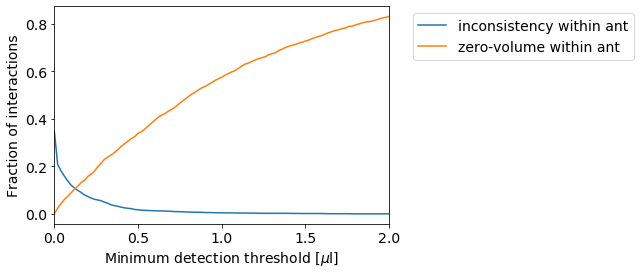

In [33]:
plt.rcParams.update({'font.size': 14})
within_ant_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')

Text(0.5, 1.0, 'old data')

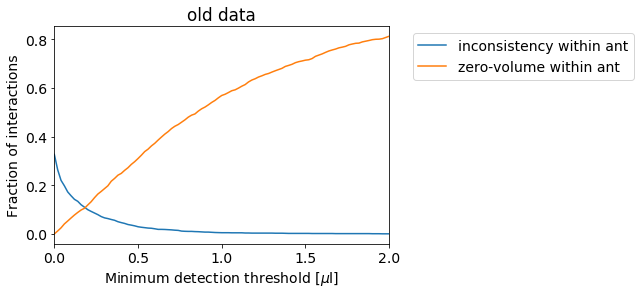

In [69]:
plt.rcParams.update({'font.size': 14})
within_ant_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')
plt.title('old data')

Text(0, 0.5, 'Fraction of interactions')

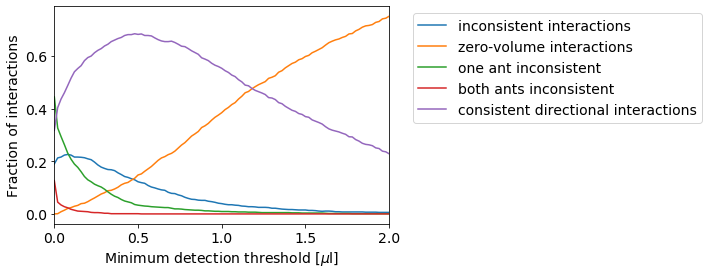

In [34]:
plt.rcParams.update({'font.size': 14})
interaction_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')


Text(0.5, 1.0, 'old data')

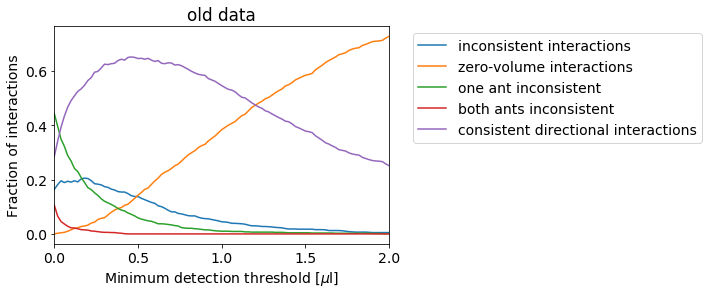

In [70]:
plt.rcParams.update({'font.size': 14})
interaction_stats_df.plot(x='minimum threshold')
plt.legend(bbox_to_anchor=[1.05,1])
plt.xlabel('Minimum detection threshold [$\mu$l]')
plt.ylabel('Fraction of interactions')
plt.title('old data')

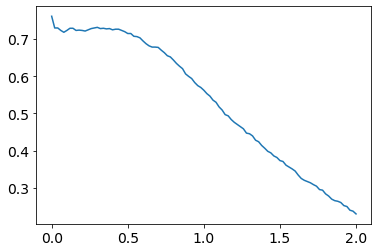

In [36]:
plt.plot(interaction_stats_df['minimum threshold'], interaction_stats_df['consistent directional interactions']+
        interaction_stats_df['one ant inconsistent'])

Text(0.5, 1.0, 'old data')

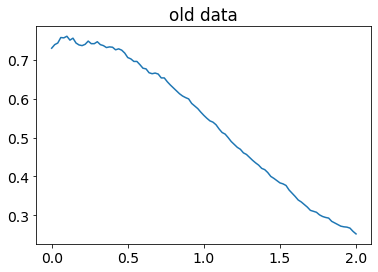

In [71]:
plt.plot(interaction_stats_df['minimum threshold'], interaction_stats_df['consistent directional interactions']+
        interaction_stats_df['one ant inconsistent'])
plt.title('old data')